In [1]:
import random
import matplotlib.pyplot as plt
import math
import statistics

In [2]:
def timeStep(board, location):
    numParticles = len(location)
    
    for j in range(0, numParticles): #One time-step

        if len(location) != 0:
            x = random.randint(0, len(location) - 1)

            p = location[x]

            sign = 1

            if random.random() < 0.5:
                sign = -1

            if (p == 0 and sign == -1) or (p == boardSize - 1 and sign == 1):
                sign = -1*sign

            if board[p + sign] == 0:
                board[p + sign] = board[p]
                board[p] = 0
                del location[x]
                location.append(p + sign)

            else:
                if board[p] == board[p + sign]:
                    board[p] = 0
                    board[p + sign] = 0
                    del location[x]
                    del location[location.index(p + sign)]
                else:
                    temp = board[p]
                    board[p] = board[p + sign]
                    board[p + sign] = temp
                    

In [3]:
def listAve(list1, list2):
    retValue = []
    for i in range(0,len(list1)):
        sum = list1[i] + list2[i]
        sum = sum / 2
        retValue.append(sum)
    return retValue

In [4]:
alphaRuns = [] # has all of the alpha particle runs
betaRuns = [] # has all of the beta particle runs
pset = [] # IOETTMCO

for k in range(0, 200): #Iterating the whole simulation k number of times
    print(k+1)


    boardA = [] # alpha board
    boardB = [] # beta board
    numPA = 100 # number of particles on the Alpha board
    numPB = 400 # number of particles on the Beta board
    boardSize = 1000 
    locationA = [] # location of all the alpha board particles
    locationB = [] # location of all the beta board particles
    timeSize = 1000 # running time of each simluation
    pfunct = [] 
    
    
    for i in range(0, boardSize): #Adding zeros to represent spots with no particle 
        boardA.append(0)
        boardB.append(0)
    
    
    for i in range(0, numPA): #populating board with 1-s to represent particle type A on board 1
        x = random.randint(0, boardSize - 1)
        while boardA[x] != 0:
            x = random.randint(0, boardSize - 1)
        boardA[x] = 1
        locationA.append(x)


    for i in range(0, numPA): #populating board with 2-s to represent particle type B on board 1
        x = random.randint(0, boardSize - 1)
        while boardA[x] != 0:
            x = random.randint(0, boardSize - 1)
        boardA[x] = 2
        locationA.append(x)
    
    for i in range(0, numPB): #populating board with 1-s to represent particle type A on board 2
        x = random.randint(0, boardSize - 1)
        while boardB[x] != 0:
            x = random.randint(0, boardSize - 1)
        boardB[x] = 1
        locationB.append(x)


    for i in range(0, numPB): #populating board with 2-s to represent particle type B on board 2
        x = random.randint(0, boardSize - 1)
        while boardB[x] != 0:
            x = random.randint(0, boardSize - 1)
        boardB[x] = 2
        locationB.append(x)
    
    Arun = [] # individual Alpha board run
    Brun= [] # individual Beta board run
    

    
    for i in range(0, timeSize): #Repeating the process up to i number of time steps 
        counter = 0
        
        for j in range(0, boardSize): # braiding code
            

            if (boardA[j] != 0) and (boardB[j] != 0):
                counter += 1
                if boardA[j] == 1:
                    boardA[j] = 2
                else:
                    boardA[j] = 1
                
                if boardB[j] == 1:
                    boardB[j] = 2
                else:
                    boardB[j] = 1
        
        pfunct.append(counter / len(locationA)) # number of braiding / number of particles as a function of time
    
        timeStep(boardA, locationA) # conducts a time step for a board
        timeStep(boardB, locationB)
        
        
        Arun.append(len(locationA) / boardSize) # adds in the density for this time step
        Brun.append(len(locationB) / boardSize)
        
        
    alphaRuns.append(Arun) # adds it to the alphaRuns matrix which has all of the runs ever conducted
    betaRuns.append(Brun) # same for beta
    pset.append(pfunct) # holds all the braiding functions
    
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [5]:
time = [] # populates the time array


for i in range(0, len(Arun)):
    time.append(i)


In [6]:
runs = [] # runs holds an average of each alpharun[i] and betarun[i]
for i in range(0,len(alphaRuns)):
    runs.append(listAve(alphaRuns[i],betaRuns[i]))


In [30]:
#average = [] # holds the average number of particles at each time t in runs.
averageAlpha = [] # holds the average number of alpha particles at each time t.
averageBeta = [] # same as above

difference = []
Sum = []

totalStdA = [] # standard deviation for each collumn in alphaRuns
totalStdB = []

averageP = [] # will hold the average number of majorana events per time step per number of particles
print(pset[0][500])
for i in range(0, len(alphaRuns[0])):
    
    sumA = 0
    sumB = 0
    tempA = []
    tempB = []
    sumP = 0
               
    for j in range(0, len(alphaRuns)):
        sumA = sumA + alphaRuns[j][i]
        sumB = sumB + betaRuns[j][i]
        sumP = sumP + pset[j][i]
        tempA.append(alphaRuns[j][i])
        tempB.append(betaRuns[j][i])
    
        
    averageAlpha.append(sumA / len(alphaRuns))
    averageBeta.append(sumB / len(betaRuns))
    difference.append(-1*(sumA / len(alphaRuns) - sumB / len(betaRuns)))
    Sum.append((sumA / len(alphaRuns) + sumB / len(betaRuns)))
                      
    averageP.append(sumP / len(pset))
    totalStdA.append(1*(statistics.stdev(tempA)/math.sqrt(len(alphaRuns))))
    totalStdB.append(1*(statistics.stdev(tempB)/math.sqrt(len(betaRuns))))


0.0


Text(0, 0.5, 'Particle Density')

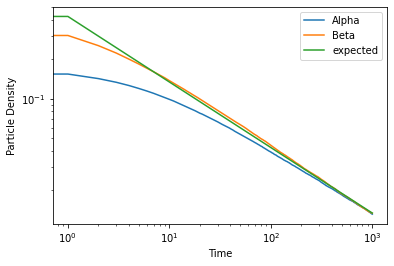

In [26]:
y = []
y.append(1.5/math.sqrt(4*math.pi*1))

for i in range(1, len(time)):
    y.append(1.5/math.sqrt(4*math.pi*i))

    
plt.xscale("log")
plt.yscale("log")

plt.plot(time, averageAlpha, label = 'Alpha')
plt.plot(time, averageBeta, label = 'Beta')
plt.plot(time, y, label = 'expected')
plt.legend(loc="upper right")
plt.xlabel('Time')
plt.ylabel('Particle Density')
#plt.errorbar(time, average, yerr = totalStd, fmt = 'o', color = 'r')

In [39]:
dDiff = []
dSum = []
dDiff.append(0)
dSum.append(0)
for i in range(2,len(time)):
    dDiff.append(abs((difference[i]-difference[i-2])/2))
    dSum.append(abs((Sum[i]-Sum[i-2])/2))
dDiff.append(dDiff[len(dDiff)-1])
dSum.append(dSum[len(dSum)-1])
dDiff[0] = dDiff[1]
dSum[0] = dSum[1]


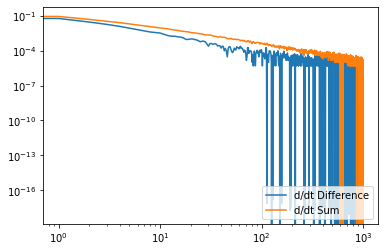

In [41]:
plt.xscale("log")
plt.yscale("log")
plt.plot(time, difference, label = 'pBeta - pAlpha')
plt.plot(time, dDiff, label = 'd/dt Difference')
plt.plot(time, Sum, label = 'pBeta + pAlpha')
plt.plot(time, dSum, label = 'd/dt Sum')
plt.legend(loc="lower right")

C value for the Alpha run is  1.4612934629216807
C value for the Beta run is  1.4937279302821025


Text(0, 0.5, 'C')

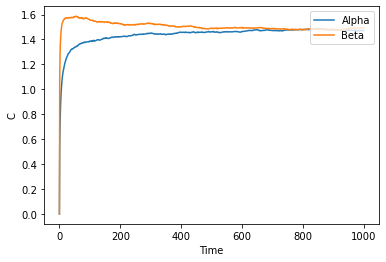

In [10]:
coefA = []
coefB = []
ave_tempAlpha = 0 # Average coefficient Alpha
ave_tempBeta = 0 # Average coefficient Beta

for i in range(0, len(averageAlpha)):
    coefA.append(averageAlpha[i] * (math.sqrt(4*math.pi*time[i])))
    coefB.append(averageBeta[i] * (math.sqrt(4*math.pi*time[i])))
    if i >= 200:
        ave_tempAlpha = coefA[i] + ave_tempAlpha
        ave_tempBeta = coefB[i] + ave_tempBeta

        

ave_tempAlpha = ave_tempAlpha / (timeSize - 199) 
ave_tempBeta = ave_tempBeta / (timeSize - 199)

print("C value for the Alpha run is ", ave_tempAlpha)
print("C value for the Beta run is ", ave_tempBeta)
    
plt.plot(time, coefA, label = 'Alpha')
plt.plot(time, coefB, label = 'Beta')
plt.legend(loc="upper right")
plt.xlabel('Time')
plt.ylabel('C')


NameError: name 'average' is not defined

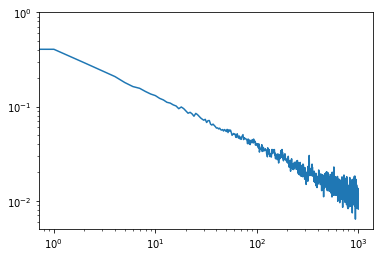

In [11]:
plt.xscale("log")
plt.yscale("log")

plt.plot(time, averageP)
plt.plot(time, average)
plt.xlabel('Time')
plt.ylabel('P')
print(averageP[500])
